**Name:** Mehakk Lunkar<br>
**Registration No.:** 2448531<br>
**Lab-2:** Fourier Transform and Frequency Spectrum Analysis of Signals<br>

Question 1 - Signal Analysis<br>
(a) Generate a basic sinusoidal signal<br>
(b) Plot the time-domain waveform<br>
(c) Compute DTFT (continuous frequency spectrum)<br>
(d) Compute DFT (discrete frequency spectrum)<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

(a) Generate a Basic Sinusoidal Signal

In [2]:
fs = 1000          # Sampling frequency (Hz)
f = 5              # Signal frequency (Hz)
T = 1              # Duration (1 second)

t = np.linspace(0, T, int(fs*T), endpoint=False)

x = np.sin(2 * np.pi * f * t)

print("First 10 samples of signal:", x[:10])

First 10 samples of signal: [0.         0.03141076 0.06279052 0.09410831 0.12533323 0.15643447
 0.18738131 0.21814324 0.24868989 0.27899111]


(b) Plot the Time-Domain Waveform

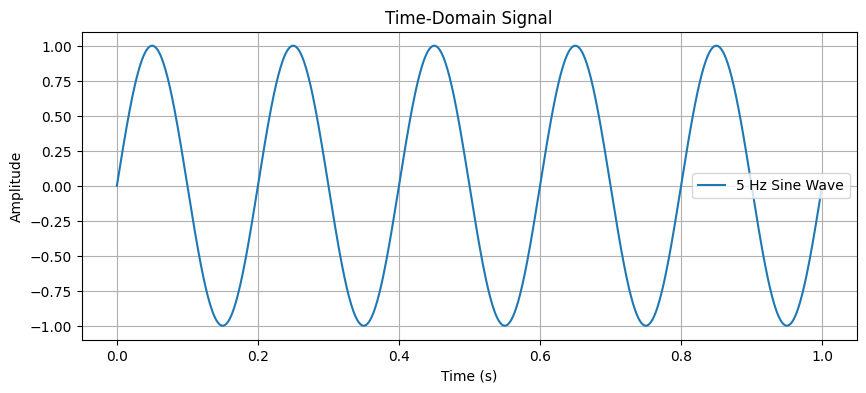

In [3]:
plt.figure(figsize=(10,4))
plt.plot(t, x, label="5 Hz Sine Wave")
plt.title("Time-Domain Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

(c) Compute and Plot DTFT (Continuous Frequency Spectrum)

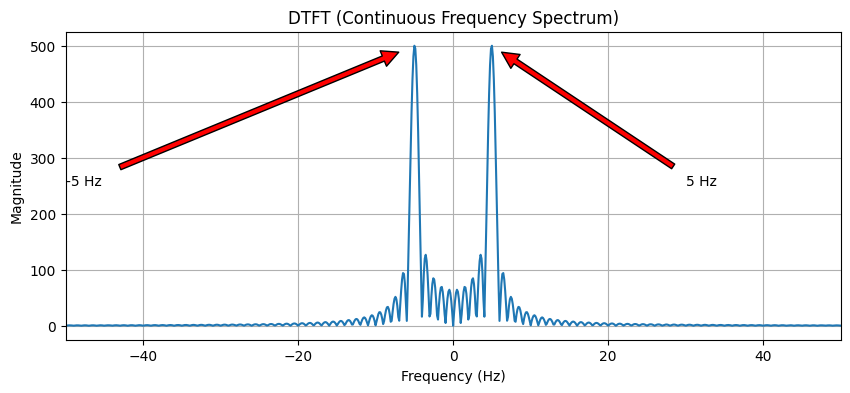

In [4]:
N_dtft = 8192
X_dtft = np.fft.fft(x, N_dtft)
freq_dtft = np.fft.fftfreq(N_dtft, 1/fs)

plt.figure(figsize=(10,4))
plt.plot(np.fft.fftshift(freq_dtft), np.fft.fftshift(np.abs(X_dtft)))
plt.title("DTFT (Continuous Frequency Spectrum)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)

plt.annotate("5 Hz", xy=(5, max(np.abs(X_dtft))),
             xytext=(30, max(np.abs(X_dtft))/2),
             arrowprops=dict(facecolor='red', shrink=0.05))
plt.annotate("-5 Hz", xy=(-5, max(np.abs(X_dtft))),
             xytext=(-50, max(np.abs(X_dtft))/2),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.xlim(-50, 50)
plt.show()

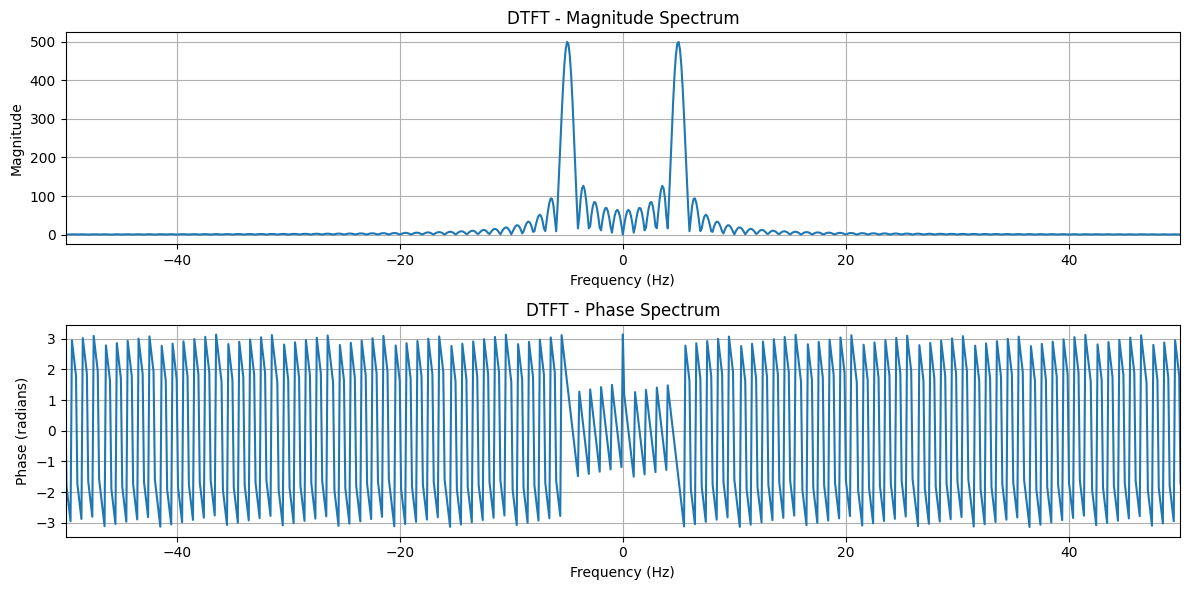

In [5]:
N_dtft = 8192
X_dtft = np.fft.fft(x, N_dtft)
freq_dtft = np.fft.fftfreq(N_dtft, 1/fs)

plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
plt.plot(np.fft.fftshift(freq_dtft), np.fft.fftshift(np.abs(X_dtft)))
plt.title("DTFT - Magnitude Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.xlim(-50, 50)

plt.subplot(2,1,2)
plt.plot(np.fft.fftshift(freq_dtft), np.fft.fftshift(np.angle(X_dtft)))
plt.title("DTFT - Phase Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase (radians)")
plt.grid(True)
plt.xlim(-50, 50)

plt.tight_layout()
plt.show()

(d) Compute and Plot DFT (Discrete Frequency Spectrum)

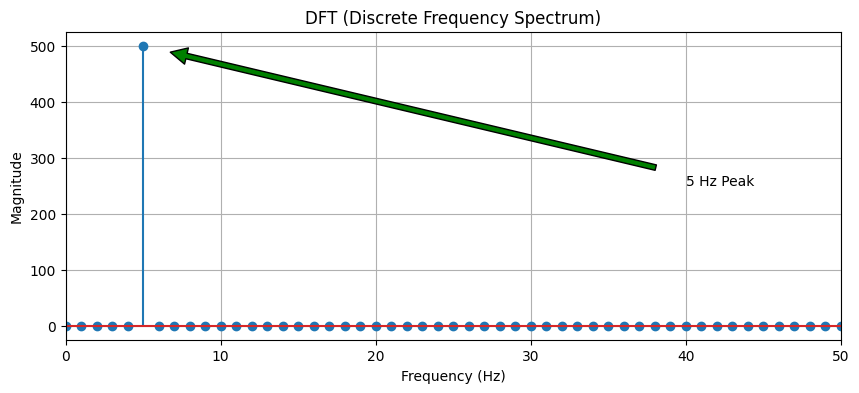

In [6]:
N_dft = len(x)
X_dft = np.fft.fft(x, N_dft)
freq_dft = np.fft.fftfreq(N_dft, 1/fs)

plt.figure(figsize=(10,4))
plt.stem(freq_dft[:N_dft//2], np.abs(X_dft)[:N_dft//2])
plt.title("DFT (Discrete Frequency Spectrum)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)

peak_index = np.argmax(np.abs(X_dft[:N_dft//2]))
plt.annotate("5 Hz Peak",
             xy=(freq_dft[peak_index], np.abs(X_dft[peak_index])),
             xytext=(40, np.abs(X_dft[peak_index])/2),
             arrowprops=dict(facecolor='green', shrink=0.05))

plt.xlim(0, 50)
plt.show()

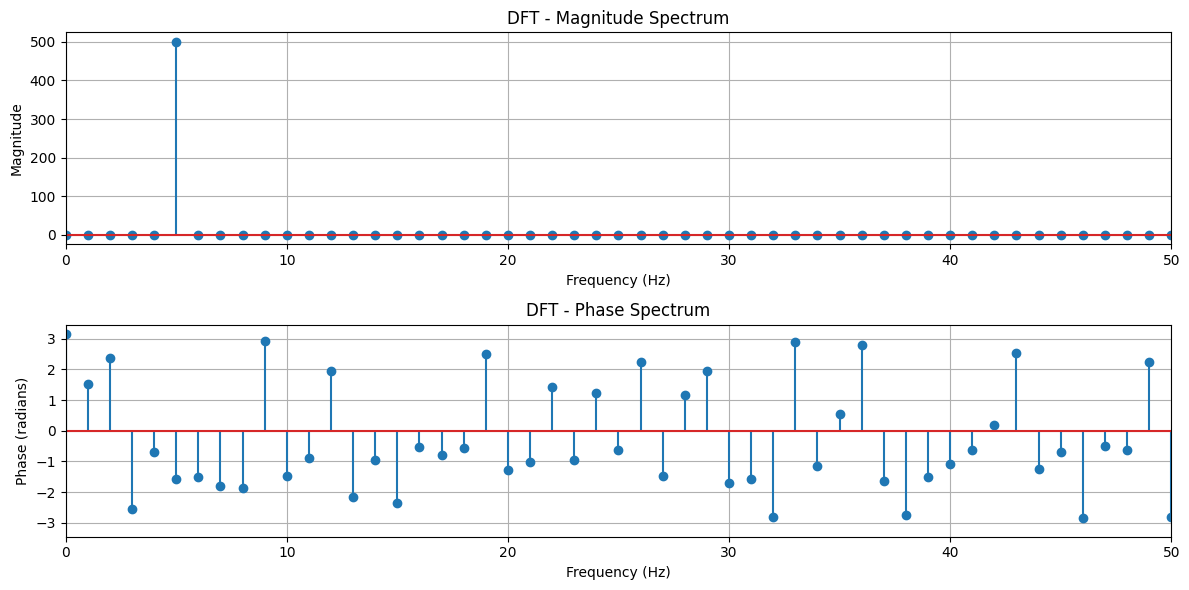

In [7]:
N_dft = len(x)
X_dft = np.fft.fft(x, N_dft)
freq_dft = np.fft.fftfreq(N_dft, 1/fs)

plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
plt.stem(freq_dft[:N_dft//2], np.abs(X_dft)[:N_dft//2])
plt.title("DFT - Magnitude Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.xlim(0, 50)

plt.subplot(2,1,2)
plt.stem(freq_dft[:N_dft//2], np.angle(X_dft)[:N_dft//2])
plt.title("DFT - Phase Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase (radians)")
plt.grid(True)
plt.xlim(0, 50)

plt.tight_layout()
plt.show()


**Insights:**<br>
DTFT: Smooth continuous magnitude spectrum with sharp peaks at ±5 Hz, and corresponding phase jumps.<br>
DFT: Discrete spikes at 5 Hz (and −5 Hz if you include the second half). Phase is 0 or π depending on symmetry of sine wave.

Question 2 - Composite Signal Analysis<br>
(a) Generate a composite signal of multiple sinusoids<br>
(b) Plot the time-domain waveform<br>
(c) Compute DTFT (continuous frequency spectrum)<br>
(d) Compute DFT (discrete frequency spectrum)<br>

(a) Generate a Composite Signal<br>
(b)  Plot the time-domain waveform

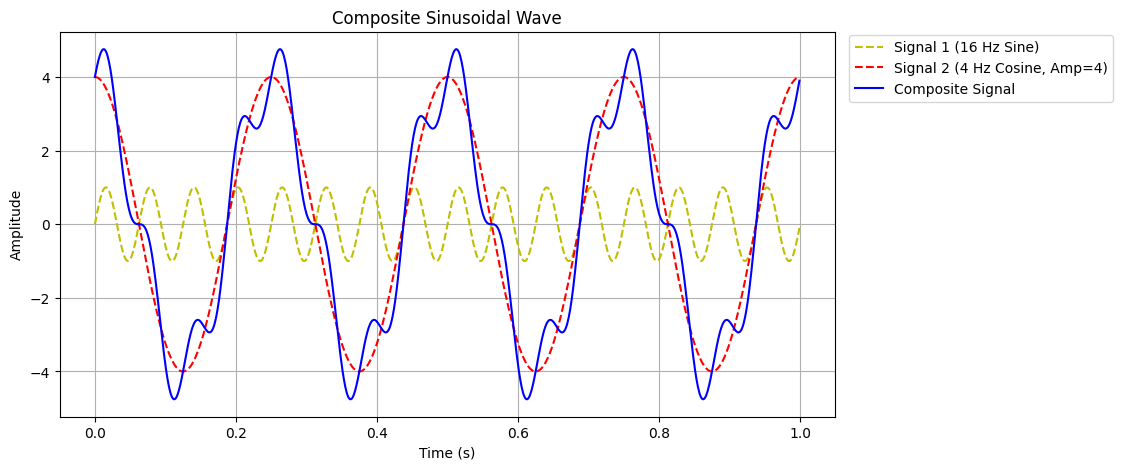

In [8]:
# Define signals
f1 = 16   # frequency of first signal (Hz)
f2 = 4    # frequency of second signal (Hz)
fs = 1000 # common sampling frequency (Hz)
t = np.arange(0, 1, 1/fs)  # time vector (1 second duration)

# Component signals
signal_1 = np.sin(2 * np.pi * f1 * t)             # sine wave
signal_2 = 4 * np.cos(2 * np.pi * f2 * t)         # cosine wave with amplitude scaling

# Composite signal
composite_signal = signal_1 + signal_2

# Plot signals
plt.figure(figsize=(10,5))
plt.plot(t, signal_1, linestyle='dashed', color='y', label='Signal 1 (16 Hz Sine)')
plt.plot(t, signal_2, linestyle='dashed', color='r', label='Signal 2 (4 Hz Cosine, Amp=4)')
plt.plot(t, composite_signal, color='b', label='Composite Signal')
plt.title("Composite Sinusoidal Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend(bbox_to_anchor=(1.01, 1.01))
plt.grid(True)
plt.show()


(c) DTFT (Magnitude + Phase Spectrum):

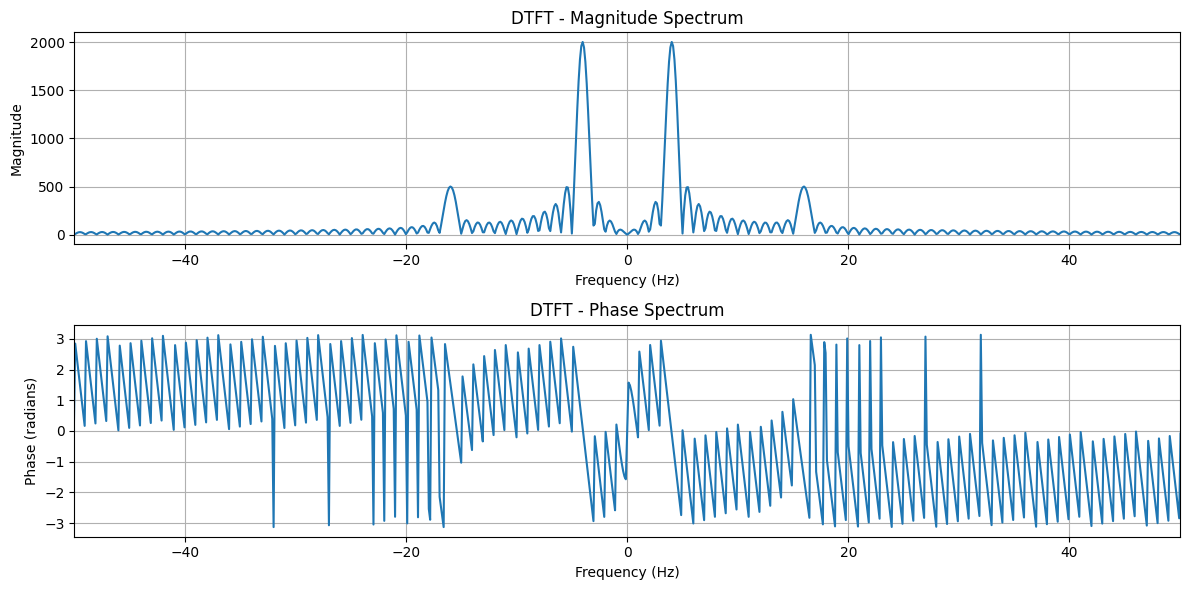

In [9]:
N_dtft = 8192
X_dtft = np.fft.fft(composite_signal, N_dtft)
freq_dtft = np.fft.fftfreq(N_dtft, 1/fs)

plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
plt.plot(np.fft.fftshift(freq_dtft), np.fft.fftshift(np.abs(X_dtft)))
plt.title("DTFT - Magnitude Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.xlim(-50, 50)

plt.subplot(2,1,2)
plt.plot(np.fft.fftshift(freq_dtft), np.fft.fftshift(np.angle(X_dtft)))
plt.title("DTFT - Phase Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase (radians)")
plt.grid(True)
plt.xlim(-50, 50)

plt.tight_layout()
plt.show()

(d) DFT (Magnitude + Phase Spectrum)

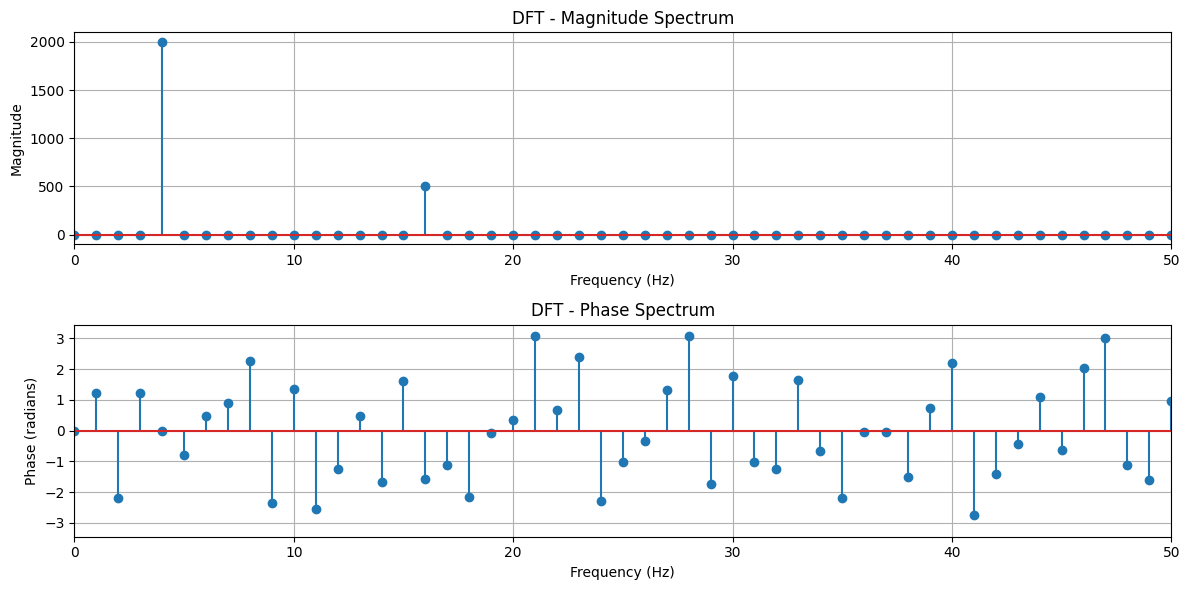

In [10]:
N_dft = len(composite_signal)
X_dft = np.fft.fft(composite_signal, N_dft)
freq_dft = np.fft.fftfreq(N_dft, 1/fs)

plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
plt.stem(freq_dft[:N_dft//2], np.abs(X_dft)[:N_dft//2])
plt.title("DFT - Magnitude Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.xlim(0, 50)

plt.subplot(2,1,2)
plt.stem(freq_dft[:N_dft//2], np.angle(X_dft)[:N_dft//2])
plt.title("DFT - Phase Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase (radians)")
plt.grid(True)
plt.xlim(0, 50)

plt.tight_layout()
plt.show()


Question 3: Exponentially decaying signal<br>
(a) Generate an exponentially decaying signal.<br>
(b) Plot the time-domain waveform.<br>
(c) Compute the Discrete-Time Fourier Transform (DTFT) and plot the continuous frequency spectrum.<br>
(d) Compute the Discrete Fourier Transform (DFT) and plot the discrete frequency spectrum.<br>
(e) Analyze the relationship between the time-domain waveform and the frequency-domain representation.<br>

(a) Generate an exponentially decaying signal.<br>
(b) Plot the time-domain waveform.<br>

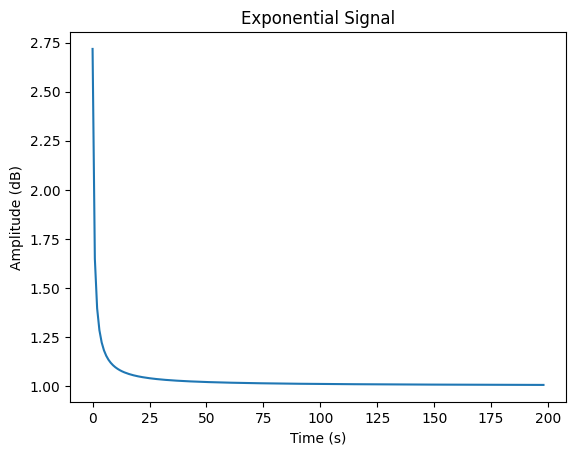

In [11]:
t = np.arange(1, 200, 1)
signal = np.exp(1/t)

plt.plot(signal)
plt.title('Exponential Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (dB)')
plt.show()

(c) Compute the Discrete-Time Fourier Transform (DTFT) and plot the continuous frequency spectrum.

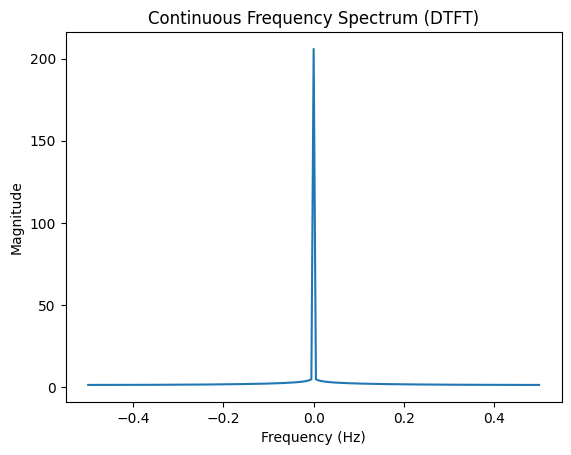

In [12]:
frequencies = np.linspace(-1/2, 1/2, len(t))
dtft = np.fft.fftshift(np.fft.fft(signal))

plt.plot(frequencies, np.abs(dtft))
plt.title("Continuous Frequency Spectrum (DTFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

(d) Compute the Discrete Fourier Transform (DFT) and plot the discrete frequency spectrum.

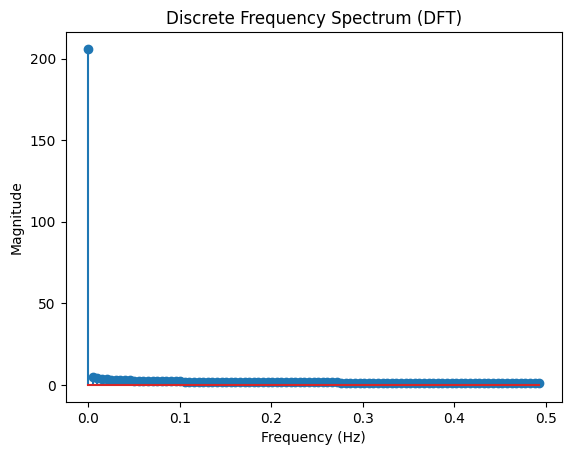

In [13]:
dft = np.fft.fft(signal)
frequencies_dft = np.fft.fftfreq(len(signal), 1)

plt.stem(frequencies_dft[:len(frequencies_dft)//2], np.abs(dft[:len(dft)//2]))
plt.title("Discrete Frequency Spectrum (DFT)")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

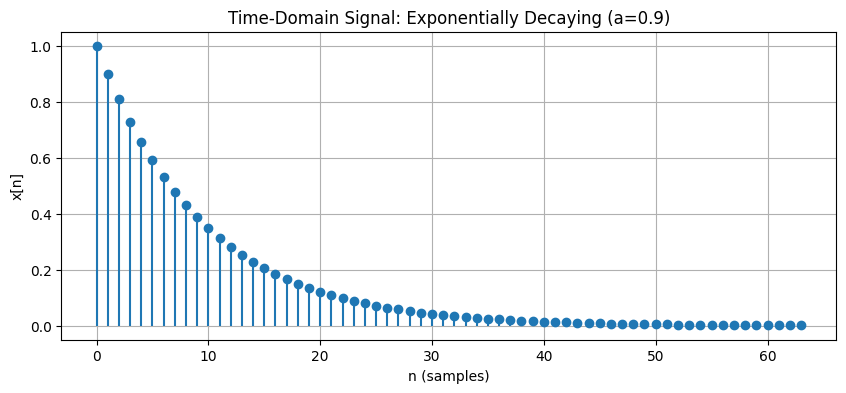

In [14]:
N = 64               # Number of samples
n = np.arange(N)     # Time index
a = 0.9              # Decay factor (0 < a < 1)

x = a**n

plt.figure(figsize=(10,4))
plt.stem(n, x, basefmt=" ")
plt.title("Time-Domain Signal: Exponentially Decaying (a=0.9)")
plt.xlabel("n (samples)")
plt.ylabel("x[n]")
plt.grid(True)
plt.show()

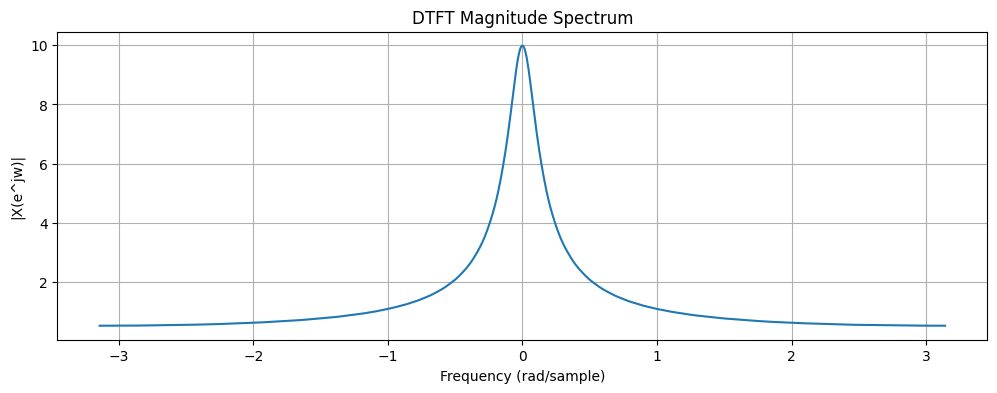

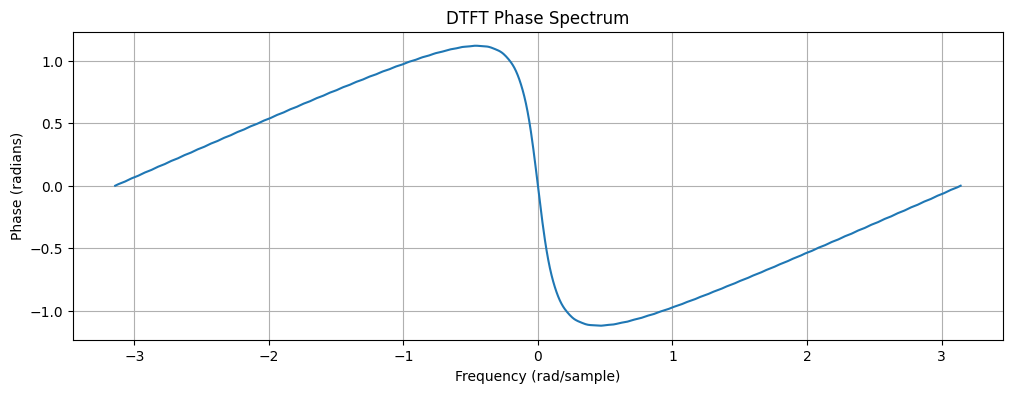

In [15]:
w = np.linspace(-np.pi, np.pi, 1024)

X_dtft = np.array([np.sum(x * np.exp(-1j*wn*n)) for wn in w])

plt.figure(figsize=(12,4))
plt.plot(w, np.abs(X_dtft))
plt.title("DTFT Magnitude Spectrum")
plt.xlabel("Frequency (rad/sample)")
plt.ylabel("|X(e^jw)|")
plt.grid(True)
plt.show()

plt.figure(figsize=(12,4))
plt.plot(w, np.angle(X_dtft))
plt.title("DTFT Phase Spectrum")
plt.xlabel("Frequency (rad/sample)")
plt.ylabel("Phase (radians)")
plt.grid(True)
plt.show()


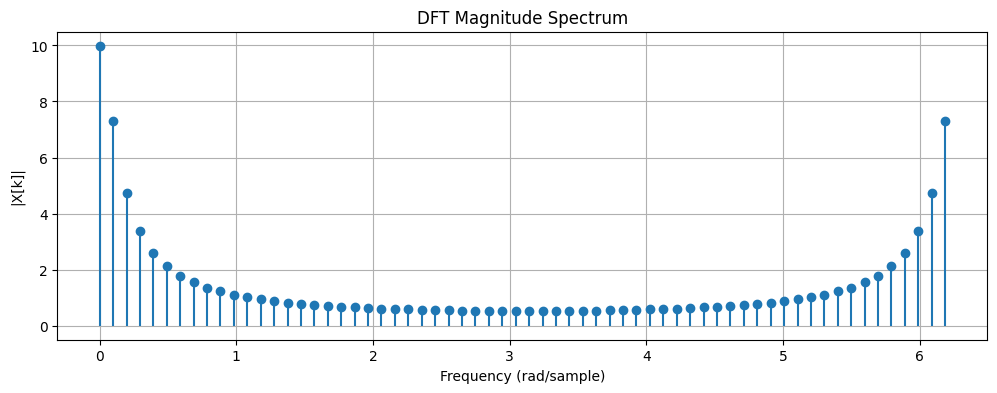

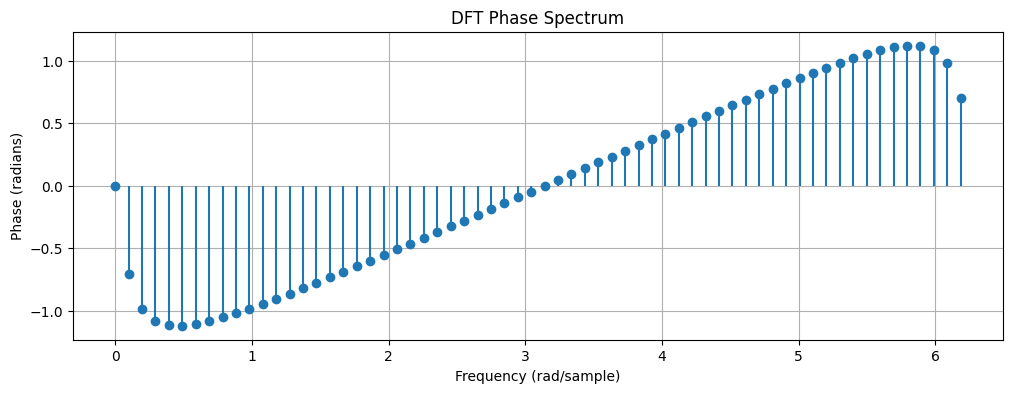

In [16]:
X_dft = np.fft.fft(x, N)
k = np.arange(N)
freq_bins = 2 * np.pi * k / N

plt.figure(figsize=(12,4))
plt.stem(freq_bins, np.abs(X_dft), basefmt=" ")
plt.title("DFT Magnitude Spectrum")
plt.xlabel("Frequency (rad/sample)")
plt.ylabel("|X[k]|")
plt.grid(True)
plt.show()

plt.figure(figsize=(12,4))
plt.stem(freq_bins, np.angle(X_dft), basefmt=" ")
plt.title("DFT Phase Spectrum")
plt.xlabel("Frequency (rad/sample)")
plt.ylabel("Phase (radians)")
plt.grid(True)
plt.show()

(e) Analyze the relationship between the time-domain waveform and the frequency-domain representation.

**Analysis of Results**

- **Time Domain (x[n])**:  
  The signal is an exponentially decaying sequence, where each sample is `a^n` with `a=0.9`.  
  It starts at 1 (when n=0) and gradually decays towards 0.

- **DTFT (Continuous Spectrum)**:  
  - The DTFT shows the true frequency-domain representation of the signal over a continuous frequency axis `[-π, π]`.  
  - The magnitude spectrum has a smooth decay and the phase spectrum shows how the frequency components shift over time.  

- **DFT (Discrete Spectrum)**:  
  - The DFT is a sampled version of the DTFT, computed only at `N=64` equally spaced frequency bins.  
  - It matches the DTFT at those discrete points but lacks continuous resolution.  
  - Increasing `N` makes the DFT a better approximation of the DTFT.<br>
  
  Here, the time-domain waveform is the exponentially decaying signal. Correspondingly, the frequency-domain spectrum spreads over a range of frequencies. DTFT has a continuous spectrum, while DFT has only discrete points.



Question 4:<br>
(a) Generate a rectangular pulse signal of finite duration in the time domain.<br>
(b) Plot the time-domain waveform.<br>
(c) Compute the Discrete-Time Fourier Transform (DTFT) and plot the continuous frequency spectrum.<br>
(d) Compute the Discrete Fourier Transform (DFT) and plot the discrete frequency spectrum.<br>
(e) Analyze the relationship between the time-domain waveform and the frequency-domain representation.<br>

(a) Generate a rectangular pulse signal of finite duration in the time domain.

In [17]:
N = 64                     # Total number of samples
width = 16                 # Pulse width
pulse = np.zeros(N)
pulse[N//2 - width//2 : N//2 + width//2] = 1  # Centered rectangular pulse

n = np.arange(N)

(b) Plot the time-domain waveform.

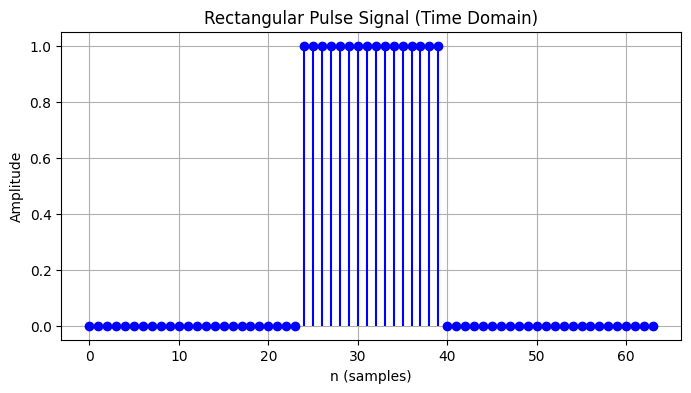

In [18]:
plt.figure(figsize=(8,4))
plt.stem(n, pulse, basefmt=" ", linefmt="b", markerfmt="bo")
plt.title("Rectangular Pulse Signal (Time Domain)")
plt.xlabel("n (samples)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

(c) Compute the Discrete-Time Fourier Transform (DTFT) and plot the continuous frequency spectrum.

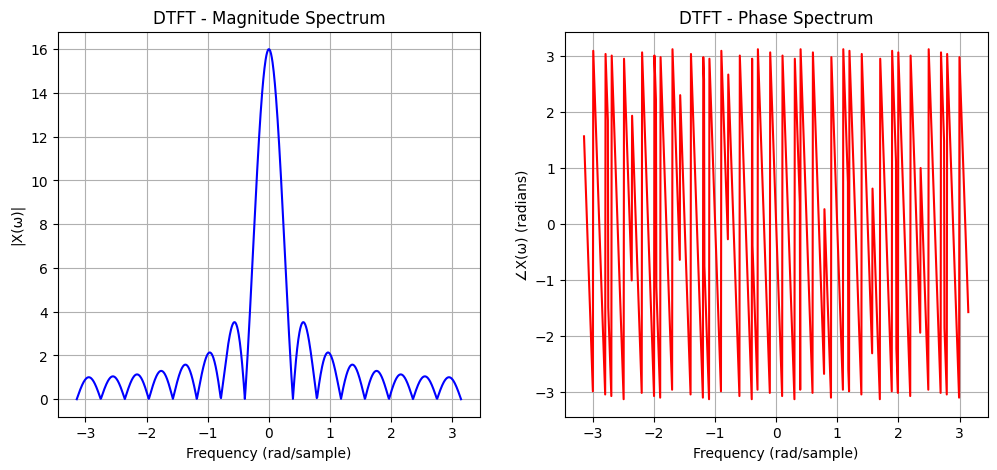

In [19]:
omega = np.linspace(-np.pi, np.pi, 1000)     # Frequency grid
X_dtft = np.zeros(len(omega), dtype=complex)

for k, w in enumerate(omega):
    X_dtft[k] = np.sum(pulse * np.exp(-1j * w * n))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(omega, np.abs(X_dtft), 'b')
plt.title("DTFT - Magnitude Spectrum")
plt.xlabel("Frequency (rad/sample)")
plt.ylabel("|X(ω)|")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(omega, np.angle(X_dtft), 'r')
plt.title("DTFT - Phase Spectrum")
plt.xlabel("Frequency (rad/sample)")
plt.ylabel("∠X(ω) (radians)")
plt.grid(True)

plt.show()

(d) Compute the Discrete Fourier Transform (DFT) and plot the discrete frequency spectrum.

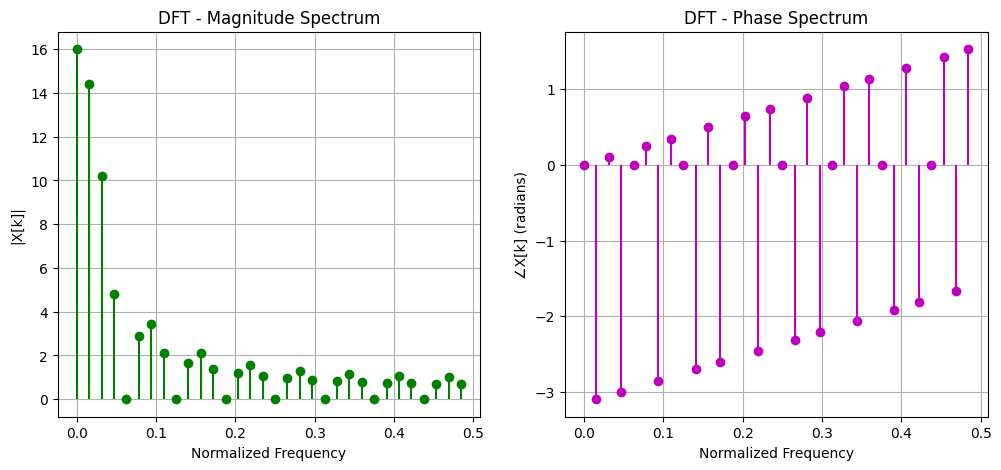

In [20]:
X_dft = np.fft.fft(pulse, N)
freq_dft = np.fft.fftfreq(N, 1)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.stem(freq_dft[:N//2], np.abs(X_dft[:N//2]), basefmt=" ", linefmt="g", markerfmt="go")
plt.title("DFT - Magnitude Spectrum")
plt.xlabel("Normalized Frequency")
plt.ylabel("|X[k]|")
plt.grid(True)

plt.subplot(1,2,2)
plt.stem(freq_dft[:N//2], np.angle(X_dft[:N//2]), basefmt=" ", linefmt="m", markerfmt="mo")
plt.title("DFT - Phase Spectrum")
plt.xlabel("Normalized Frequency")
plt.ylabel("∠X[k] (radians)")
plt.grid(True)

plt.show()

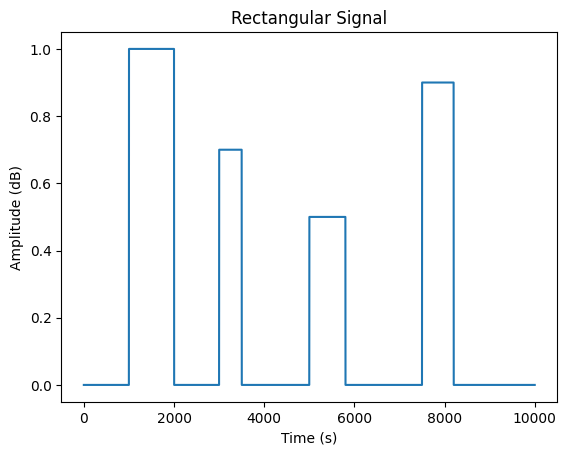

In [21]:
T = 10
fs = 1000
t = np.linspace(0, T, int(T * fs), endpoint=False)

pulse1 = np.where((t >= 1) & (t <= 2), 1.0, 0.0)
pulse2 = np.where((t >= 3) & (t <= 3.5), 0.7, 0.0)
pulse3 = np.where((t >= 5) & (t <= 5.8), 0.5, 0.0)
pulse4 = np.where((t >= 7.5) & (t <= 8.2), 0.9, 0.0)

signal = pulse1 + pulse2 + pulse3 + pulse4

plt.plot(signal)
plt.title('Rectangular Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (dB)')
plt.show()

(c) Compute the Discrete-Time Fourier Transform (DTFT) and plot the continuous frequency spectrum.

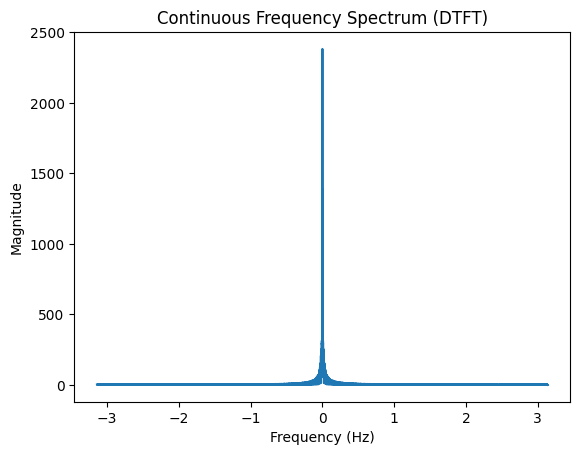

In [22]:
frequencies = np.linspace(-np.pi, np.pi, len(t))
dtft = np.fft.fftshift(np.fft.fft(signal))

plt.plot(frequencies, np.abs(dtft))
plt.title("Continuous Frequency Spectrum (DTFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

(d) Compute the Discrete Fourier Transform (DFT) and plot the discrete frequency spectrum.

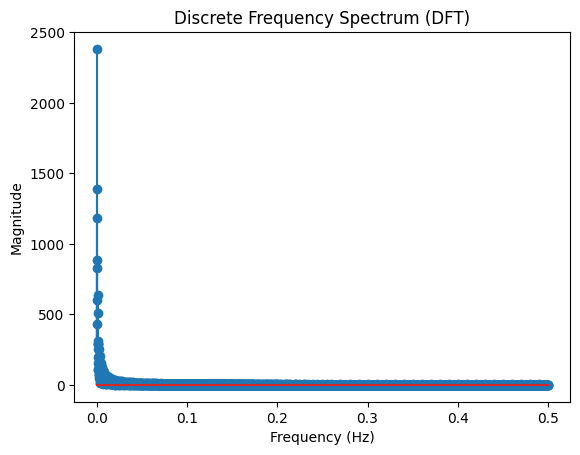

In [23]:
dft = np.fft.fft(signal)
frequencies_dft = np.fft.fftfreq(len(signal), 1)

plt.stem(frequencies_dft[:len(frequencies_dft)//2], np.abs(dft[:len(dft)//2]))
plt.title("Discrete Frequency Spectrum (DFT)")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

(e) Analyze the relationship between the time-domain waveform and the frequency-domain
representation.

The time-domain waveform of the aperiodic signal is described by a set of nonuniformly spaced rectangular pulses. The frequency-domain spectrum shows somewhat of a complicated pattern, since the energy associated with an aperiodic signal spreads out over a fairly wide frequency range. The relationship between the two waveforms illustrates how the apparent irregularities in the time domain translate into a more complicated, nonrepetitive frequency spectrum.The DFT plot confirms that the signal is aperiodic and composed of rectangular pulses. The strong low-frequency components and rapid decay in magnitude as the frequency increases are characteristic of such signals. The absence of distinct periodic components in the frequency spectrum further supports the signal’s aperiodic nature. The DFT plot effectively captures how the irregular, non-repeating time-domain characteristics of the signal translate into the frequency domain.

**Write an inference on the frequency domain analysis of various signals using DTFT and DFT.**

The frequency domain analysis reveals that a single-frequency sine wave is purely a single tone with no other frequency components. The energy is concentrated entirely at the specific frequency of the sine wave.

The frequency spectrum of a multiple-frequency sinusoidal wave clearly indicates the presence of multiple distinct tones. The frequency domain provides an intuitive understanding of how each frequency contributes to the overall signal.

The frequency spectrum of an exponentially decaying signal indicates that the signal contains a wide range of frequency components. The broad spectrum reflects the rapid changes in the signal as it decays, indicating a mixture of low and high-frequency content.

The frequency domain analysis of an aperiodic rectangular signal reveals a complex and broad frequency spectrum. The absence of periodicity in the time domain leads to a continuous spread of energy across frequencies, and the DFT highlights the non-repetitive nature of the signal.